# Data Analysis For Fake News Project

## Import modules

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from mord import LogisticAT

## Create Mock Database to Prepare Code

In [7]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate mockup data
num_participants = 100  # Total number of participants

# Generate Participant IDs, ranging from 1 to 100
participant_ids = np.arange(1, num_participants + 1)

# Randomly assign treatment_group (0 for control, 1 for treatment)
treatment_group = np.random.choice([0, 1], num_participants)

# Generate Question IDs, ranging from 1 to 10
question_ids = np.tile(np.arange(1, 11), num_participants)

# Generate random responses ('Real' or 'Fake')
responses = np.random.choice(['Real', 'Fake'], 10 * num_participants)

# Generate random confidence levels (from 1 to 5)
confidence_levels = np.random.choice(np.arange(1, 6), 10 * num_participants)

# Generate random attempts (1 for the first attempt, 2 for the second)
attempts = np.random.choice([1, 2], 10 * num_participants)

# Duplicate participant_ids for each question
participant_ids = np.repeat(participant_ids, 10)

# Duplicate treatment_group for each question
treatment_group = np.repeat(treatment_group, 10)

# Create DataFrame
df = pd.DataFrame({
    'participant_id': participant_ids,
    'treatment_group': treatment_group,
    'question_id': question_ids,
    'response': responses,
    'confidence': confidence_levels,
    'attempt': attempts
})

authenticity = ['Real', 'Fake', 'Real', 'Real', 'Fake', 'Fake', 'Real', 'Fake', 'Real', 'Fake']
df['authenticity'] = np.tile(authenticity, num_participants)

df['correct'] = np.where(df['response'] == df['authenticity'], 1, 0)

# Show the first few rows of the DataFrame
print(df.head())



   participant_id  treatment_group  question_id response  confidence  attempt  \
0               1                0            1     Real           3        2   
1               1                0            2     Fake           2        2   
2               1                0            3     Fake           4        2   
3               1                0            4     Fake           1        2   
4               1                0            5     Fake           4        2   

  authenticity  correct  
0         Real        1  
1         Fake        1  
2         Real        0  
3         Real        0  
4         Fake        1  


In [27]:
# Create a mockup DataFrame for the usability questionnaire
n_participants = 50  # Number of participants
n_questions = 21  # Number of usability questions

# Generate random scores between 1 and 5 for each question and participant
data = np.random.randint(1, 6, size=(n_participants, n_questions))

# Create a list of column names based on your UsabilityQuestionnaire model
columns = [
    'easy_to_find', 'well_organised', 'easy_to_read', 'comfortable_language',
    'no_left_right_scroll', 'know_where_i_am', 'useful_cues_links',
    'easy_to_move_around', 'well_maintained_links', 'not_many_new_windows',
    'standard_placement_links', 'attractive_design', 'comfortable_colors',
    'no_irritating_features', 'consistent_look', 'easy_to_learn',
    'fast_downloads', 'distinguish_links', 'expected_responses',
    'efficient_use', 'clear_useful_messages'
]

# Create the DataFrame
df_usability = pd.DataFrame(data, columns=columns)
print(df_usability.head())


   easy_to_find  well_organised  easy_to_read  comfortable_language  \
0             4               5             2                     2   
1             3               2             1                     4   
2             4               2             5                     4   
3             1               4             5                     4   
4             4               1             5                     5   

   no_left_right_scroll  know_where_i_am  useful_cues_links  \
0                     1                2                  1   
1                     2                1                  5   
2                     4                5                  5   
3                     3                2                  2   
4                     1                1                  1   

   easy_to_move_around  well_maintained_links  not_many_new_windows  ...  \
0                    3                      3                     3  ...   
1                    3                    

## Create Plots for Score and Confidence Data

### Matplotlib Plots

#### Matplotlib scatterplot for pre/post scores betweeen groups

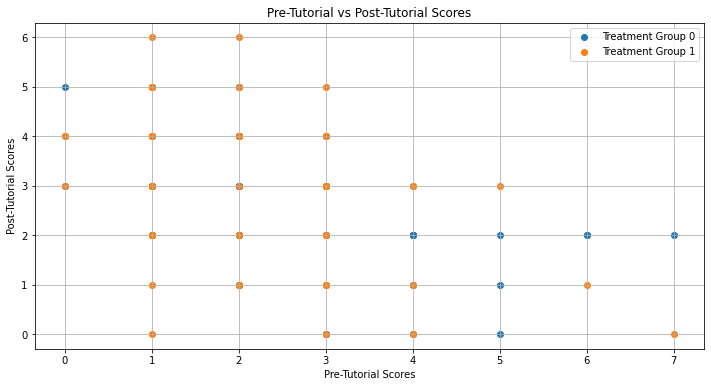

In [15]:
total_scores = df.groupby(['participant_id', 'treatment_group', 'attempt'])['correct'].sum().reset_index()

plt.figure(figsize=(12, 6))
for group in [0, 1]:
    subset = total_scores[total_scores['treatment_group'] == group]
    pre_tutorial = subset[subset['attempt'] == 1]['correct']
    post_tutorial = subset[subset['attempt'] == 2]['correct']
    plt.scatter(pre_tutorial, post_tutorial, label=f'Treatment Group {group}')
plt.title('Pre-Tutorial vs Post-Tutorial Scores')
plt.xlabel('Pre-Tutorial Scores')
plt.ylabel('Post-Tutorial Scores')
plt.legend()
plt.grid(True)
plt.show()


#### Matplotlib scatterplot for pre/post scores betweeen groups

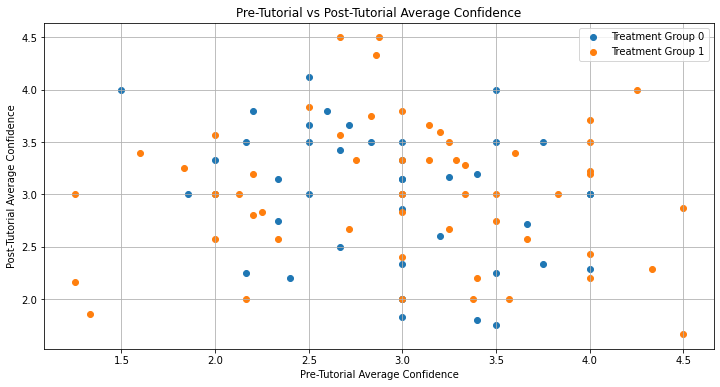

In [16]:
avg_confidence = df.groupby(['participant_id', 'treatment_group', 'attempt'])['confidence'].mean().reset_index()

plt.figure(figsize=(12, 6))
for group in [0, 1]:
    subset = avg_confidence[avg_confidence['treatment_group'] == group]
    pre_tutorial = subset[subset['attempt'] == 1]['confidence']
    post_tutorial = subset[subset['attempt'] == 2]['confidence']
    plt.scatter(pre_tutorial, post_tutorial, label=f'Treatment Group {group}')
plt.title('Pre-Tutorial vs Post-Tutorial Average Confidence')
plt.xlabel('Pre-Tutorial Average Confidence')
plt.ylabel('Post-Tutorial Average Confidence')
plt.legend()
plt.grid(True)
plt.show()

### Seabourne Plots

#### Heatmap of correct answers by question and group

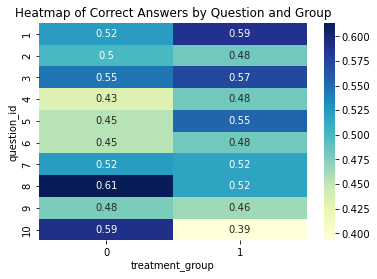

In [10]:
pivot_table = df.pivot_table(values='correct', index='question_id', columns='treatment_group', aggfunc=np.mean)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Correct Answers by Question and Group")
plt.show()

#### Seabourne boxplot for confidence levels

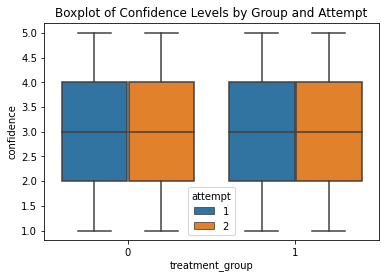

In [11]:
sns.boxplot(x='treatment_group', y='confidence', hue='attempt', data=df)
plt.title("Boxplot of Confidence Levels by Group and Attempt")
plt.show()

#### Seabourne confidence interval plot

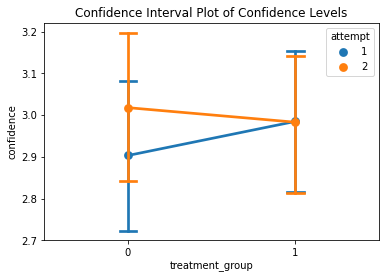

In [12]:
sns.pointplot(x='treatment_group', y='confidence', hue='attempt', data=df, ci=95, capsize=.1)
plt.title("Confidence Interval Plot of Confidence Levels")
plt.show()

#### Seabourne cumulative distribution function

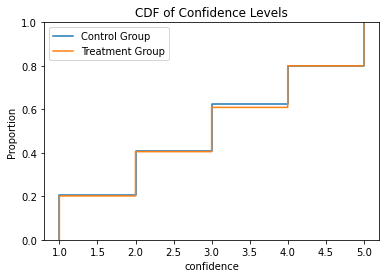

In [13]:
sns.ecdfplot(df[df['treatment_group']==0]['confidence'], label='Control Group')
sns.ecdfplot(df[df['treatment_group']==1]['confidence'], label='Treatment Group')
plt.title("CDF of Confidence Levels")
plt.legend()
plt.show()

#### Seabourne scatterplot of confidence vs score

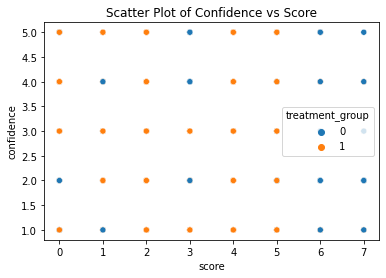

In [14]:
# First, you need to calculate the scores for each participant
scores = df.groupby(['participant_id', 'treatment_group', 'attempt'])['correct'].sum().reset_index()
scores = scores.rename(columns={'correct': 'score'})
# Merge this back to get a DataFrame that also includes confidence levels
merged_df = pd.merge(df, scores, on=['participant_id', 'treatment_group', 'attempt'])
sns.scatterplot(x='score', y='confidence', hue='treatment_group', data=merged_df)
plt.title("Scatter Plot of Confidence vs Score")
plt.show()

## Create Plots for Useability Data

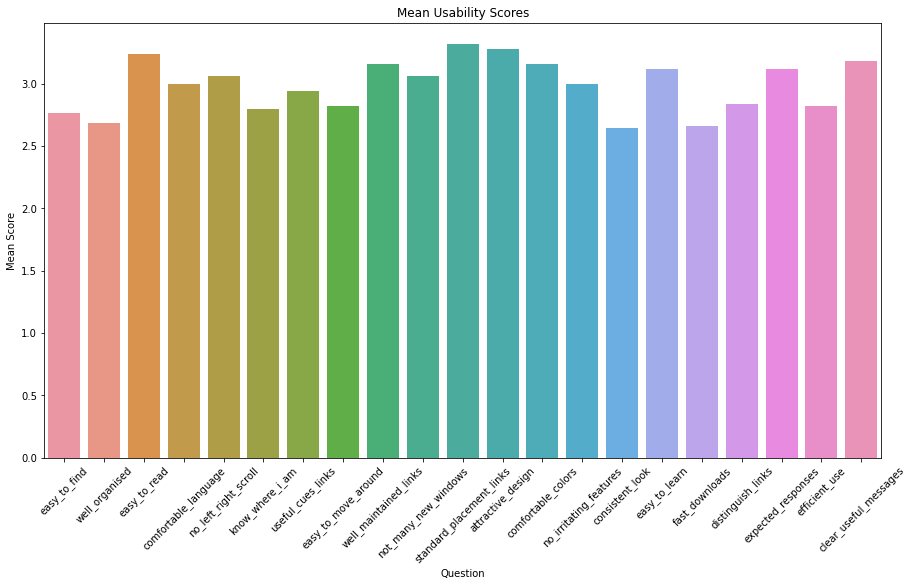

In [28]:
# Barplot for mean usability scores
mean_scores = df_usability.mean().reset_index()
mean_scores.columns = ['Question', 'Mean Score']

plt.figure(figsize=(15, 8))
sns.barplot(data=mean_scores, x='Question', y='Mean Score')
plt.xticks(rotation=45)
plt.title('Mean Usability Scores')
plt.show()

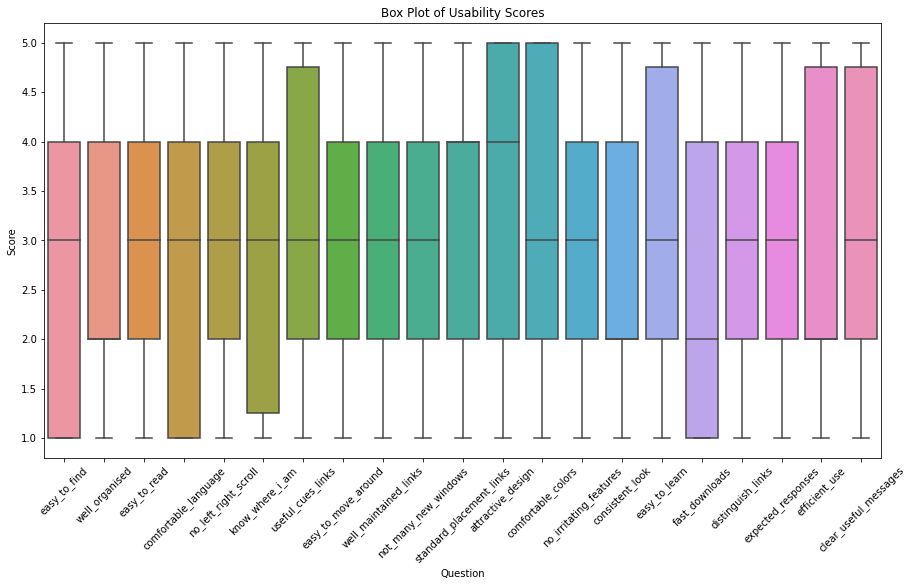

In [29]:
# Box plot for usability questionnaire data
melted_df = df_usability.melt(var_name='Question', value_name='Score')
plt.figure(figsize=(15, 8))
sns.boxplot(data=melted_df, x='Question', y='Score')
plt.xticks(rotation=45)
plt.title('Box Plot of Usability Scores')
plt.show()

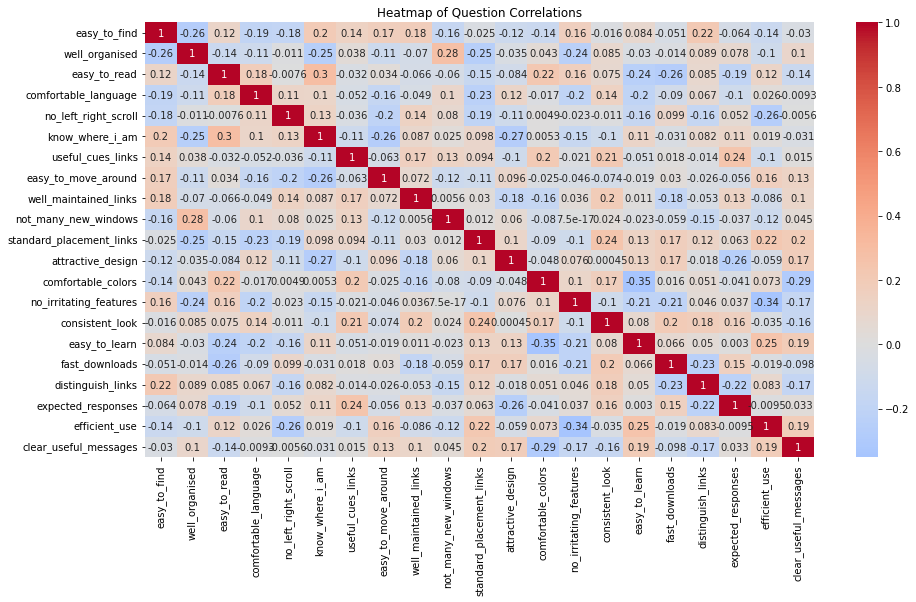

In [30]:
# Heatmap for usability questionnaire data
plt.figure(figsize=(15, 8))
sns.heatmap(df_usability.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Question Correlations')
plt.show()

## Conduct Statistical Analysis

### Check Assumptions

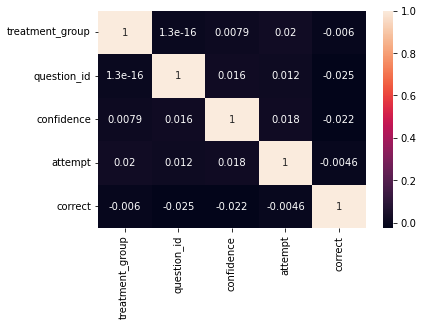

In [41]:
correlation_matrix = df[['treatment_group', 'question_id', 'confidence', 'attempt', 'correct']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


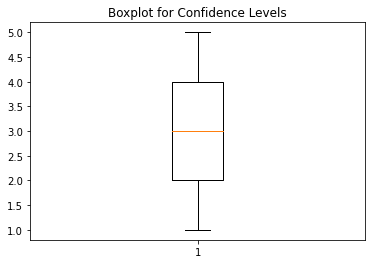

In [42]:
plt.boxplot(df['confidence'])
plt.title('Boxplot for Confidence Levels')
plt.show()


In [43]:
X = df[['treatment_group', 'attempt']]
y = df['correct']

X = sm.add_constant(X)  # Adding a constant term for intercept

model = sm.MNLogit(y, X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.692991
         Iterations 3
                          MNLogit Regression Results                          
Dep. Variable:                correct   No. Observations:                 1000
Model:                        MNLogit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Fri, 01 Sep 2023   Pseudo R-squ.:               4.003e-05
Time:                        15:39:26   Log-Likelihood:                -692.99
converged:                       True   LL-Null:                       -693.02
Covariance Type:            nonrobust   LLR p-value:                    0.9726
      correct=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0724      0.213      0.339      0.734      -0.346       0.490
treatment_grou

In [39]:
# Two-Way ANOVA
model = ols('correct ~ C(treatment_group) + C(attempt) + C(treatment_group):C(attempt)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                   sum_sq     df         F    PR(>F)
C(treatment_group)               0.008624    1.0  0.034416  0.852863
C(attempt)                       0.004976    1.0  0.019859  0.887961
C(treatment_group):C(attempt)    0.335505    1.0  1.338865  0.247512
Residual                       249.586629  996.0       NaN       NaN


In [40]:
X = df[['treatment_group', 'attempt']].values  # Features
y = df['confidence'].values  # Target variable

# Fit the model
model_ordinal = LogisticAT(alpha=0)  # alpha parameter set to zero to perform no regularisation
model_ordinal.fit(X, y)

# Getting the coefficients
print("Coefficients: ", model_ordinal.coef_)

Coefficients:  [0.02694742 0.06183222]


### Post hoc tests

In [44]:
# Adding an interaction term to the model
df['interaction'] = df['treatment_group'] * df['attempt']

# Refit the model
X = df[['treatment_group', 'attempt', 'interaction']]
X = sm.add_constant(X)

model = sm.MNLogit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.692320
         Iterations 3
                          MNLogit Regression Results                          
Dep. Variable:                correct   No. Observations:                 1000
Model:                        MNLogit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Fri, 01 Sep 2023   Pseudo R-squ.:                0.001009
Time:                        15:40:11   Log-Likelihood:                -692.32
converged:                       True   LL-Null:                       -693.02
Covariance Type:            nonrobust   LLR p-value:                    0.7059
      correct=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3218      0.303      1.061      0.289      -0.273       0.916
treatment_grou

### Effect size and power size

In [53]:
from statsmodels.stats.power import TTestIndPower

# Parameters for power analysis (replace with your actual or expected values)
effect_size = 0.8  
alpha = 0.1  
power = 0.8  

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, alpha=alpha)
print('Required sample size: ', sample_size)


Required sample size:  20.031765370714087


In [54]:
print(df.describe())

       participant_id  treatment_group  question_id   confidence      attempt  \
count     1000.000000      1000.000000  1000.000000  1000.000000  1000.000000   
mean        50.500000         0.560000     5.500000     2.974000     1.518000   
std         28.880514         0.496635     2.873719     1.416803     0.499926   
min          1.000000         0.000000     1.000000     1.000000     1.000000   
25%         25.750000         0.000000     3.000000     2.000000     1.000000   
50%         50.500000         1.000000     5.500000     3.000000     2.000000   
75%         75.250000         1.000000     8.000000     4.000000     2.000000   
max        100.000000         1.000000    10.000000     5.000000     2.000000   

           correct  interaction  
count  1000.000000  1000.000000  
mean      0.508000     0.855000  
std       0.500186     0.845393  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     1.000000  
75%       1.000000     2.000000 